In [2]:
import torch 
from torch import nn 
from torch.nn import functional as F 

# What do the transformation in 2D Layer look like with ReLU? 
* In four quandrants of the linear transformation we're keeping just one quadrant. 

# What is a Residual Layer 

In [6]:
# An operation on layers 
# consider a layer L
def L(*args):return args[0]
l0 = 0
# Non residual Layer 
l1 = L(l0)

# Residual Layer. 
l1 = l0 + L(l0)

## Variations in Residual Connections? 

<img alt="Natural and artificial neurons" width="500" caption="Variations in Res Connections" src="images/Variations_Res_Conns.png" id="neuron"/>

# What is BatchNorm? 

In [13]:
import math
import logging

import torch
import torch.nn as nn
from torch.nn import functional as F


m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output = m(input)

In [19]:
m.weight

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True)

In [16]:
input[0].std()

tensor(0.9923)

In [17]:
output[0].std()

tensor(0.9705, grad_fn=<StdBackward>)

Explainations:
    * [Andrew Ng](https://www.youtube.com/watch?v=tNIpEZLv_eg&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=27)
    * [Jeremy Howard](https://youtu.be/hkBa9pU-H48)
##  Purpose: 
  * Makes Hyperparameter search much easier. 
  * Bigger range of HP can be made to work
  * Helps train deeper models
  * has slight regulatization effect due to added noise. 

In [5]:
# Normalizing the inputs to layers:
    # * Debate about normalizing before and after activations. 

<img alt="Natural and artificial neurons" width="500" caption="batch norm nlp" src="images/batch_norm_mlp.png" id="neuron"/>

<img alt="Natural and artificial neurons" width="500" caption="batch norm nlp" src="images/batch_norm_equations.png" id="neuron"/>

## Purpose of HyperParams in Batch Norm: 
    * We might not want the mean and variance to be 0 and 1. 
        * With it's effect on activation. 

### What is exponentially Weighted Moving Averages? 

<img alt="Natural and artificial neurons" width="500" caption="batch norm nlp" src="images/ewml.png" id="neuron"/>

## Why does Batch Norm Work?  (Explain Internal CoVariate Shift)
https://www.youtube.com/watch?v=nUUqwaxLnWs&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=29

#### Internal CoVariate Shift
>    We define Internal Covariate Shift as the change in the
    distribution of network activations due to the change in
    network parameters during training. To improve the train-
    ing, we seek to reduce the internal covariate shift.
   
    - Batch Norm Paper 

The problem deeper layers suffer from are that even if the input stays the same the activations of the previous layers keep changing (due to their wieghts changing). So, in an effort to keep the activations in similar areas (alpha and beta of batchnorm) we use batch norm. Thus, this enhances learning

## Do we need to change BatchNorm in Test: 
    * Yes. Since we process examples one item at a time so mean and std might not be good. 
        * Soln: Keep a running average of mean and std which is used with examples during test. 
        
### Pytorch Soln: https://discuss.pytorch.org/t/what-does-model-eval-do-for-batchnorm-layer/7146/2
### Jeremy FastAI Explaination: https://course19.fast.ai/videos/?lesson=10&t=5899
### PyTorch LERP: https://pytorch.org/docs/stable/generated/torch.lerp.html

## Extra Paper Insights: 

Things have been tried before. 
Normal norm doesn't work. 
Training is needed. alpa and beta are being used to widen the data differently. 

"We want to perform the identity transformer. Norm doesn't do that. alpha and beta help in identity transform."

AxesSubplot(0.125,0.125;0.775x0.755)


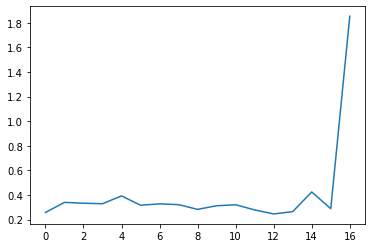

In [14]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision import models
import pandas as pd 

model_dict = torch.load('/home/vimarshc/Documents/models/resnet18_pytorch/resnet18-f37072fd.pth')
model_keys = model_dict.keys()
bn_keys = [it_key for it_key in model_keys if ('weight' in it_key or 'bias' in it_key) and 'bn' in it_key ]
model = models.resnet18()
model.load_state_dict(model_dict)

bn_weight_keys = [it for it in bn_keys if 'weight' in it]
bn_bias_keys = [it for it in bn_keys if 'bias' in it]

dfbn = pd.DataFrame({'bn_tag':bn_weight_keys})
dfbn['weight_shape'] = dfbn['bn_tag'].apply(lambda x: model_dict[x].shape[0])
dfbn['weight_mean'] = dfbn['bn_tag'].apply(lambda x: float(model_dict[x].mean()))
dfbn['bias_keys'] = bn_bias_keys
dfbn['bias_mean'] = dfbn['bias_keys'].apply(lambda x: float(model_dict[x].mean()))
dfbn['weight_name'] = dfbn['bn_tag'].apply(lambda x: x.replace('bn','conv'))
dfbn['conv_weight_mean'] = dfbn['weight_name'].apply(lambda x: float(model_dict[x].mean()))
print(dfbn.weight_mean.plot())

AxesSubplot(0.125,0.125;0.775x0.755)


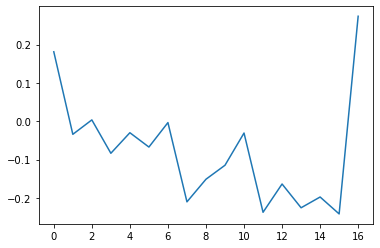

In [7]:
print(dfbn.bias_mean.plot())

AxesSubplot(0.125,0.125;0.775x0.755)


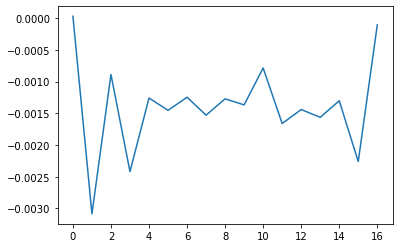

In [8]:
print(dfbn.conv_weight_mean.plot())

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


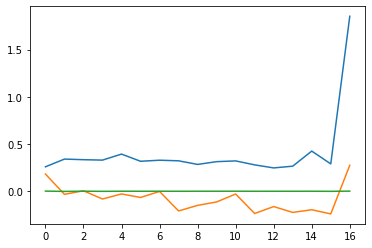

In [10]:
print(dfbn.weight_mean.plot(),dfbn.bias_mean.plot(),dfbn.conv_weight_mean.plot())

In [16]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [107]:
dfbn

,bn_tag,weight_shape,weight_mean,bias_keys,bias_mean,weight_name,conv_weight_mean
0,bn1.weight,64,0.257577,bn1.bias,0.181120,conv1.weight,0.000029
1,layer1.0.bn1.weight,64,0.339601,layer1.0.bn1.bias,-0.034137,layer1.0.conv1.weight,-0.003087
2,layer1.0.bn2.weight,64,0.333055,layer1.0.bn2.bias,0.003463,layer1.0.conv2.weight,-0.000889
3,layer1.1.bn1.weight,64,0.328692,layer1.1.bn1.bias,-0.083574,layer1.1.conv1.weight,-0.002420
4,layer1.1.bn2.weight,64,0.392430,layer1.1.bn2.bias,-0.029984,layer1.1.conv2.weight,-0.001260
5,layer2.0.bn1.weight,128,0.316419,layer2.0.bn1.bias,-0.067346,layer2.0.conv1.weight,-0.001454
6,layer2.0.bn2.weight,128,0.327573,layer2.0.bn2.bias,-0.003555,layer2.0.conv2.weight,-0.001248
7,layer2.1.bn1.weight,128,0.321264,layer2.1.bn1.bias,-0.210250,layer2.1.conv1.weight,-0.001530
8,layer2.1.bn2.weight,128,0.282911,layer2.1.bn2.bias,-0.151284,layer2.1.conv2.weight,-0.001272
9,layer3.0.bn1.weight,256,0.312275,layer3.0.bn1.bias,-0.114786,layer3.0.conv1.weight,-0.001368


## What imrovements were observed by the authors in the BatchNorm paper? 
    * Fewer steps to reach high accuracy. 
    * Stable input distributions across the layers. Claims to make the distributions more stable. 

A | B
- | - 
![alt](images/batch_norm_results.png) | ![alt](images/batch_norm_results_ii.png)

## Does Batch Norm Help with ICS? 

<img alt="Natural and artificial neurons" width="500" caption="batch norm nlp" src="images/batch_norm_ics.png" id="neuron"/>

Studies suggest that BatchNorm does not help with ICS. 

## What is the claim of the paper? 
    As normalization has been shown to help with fine tuning of NNs the paper proposed to normalize the output of each layer. But, needs to be accompanied by training, thus propsoes to add two trainable parameters determining the extend and kind of normalization taking place. 

## What are the limitations of BatchNorm? 
    1. As we use the same weight matrix it's not clear how one could use bn for RNNs. 
    2. Cannot be used for onlin learning where the batch size shrinks to 1,2 points. 

# If I take a unit vector (vectors of mean unit) and pass it through a layer with mean 0.000029 and batch norm (0.257577,0.181120) what is the strength of the resulting vector? 

## What is Covariate Shift? 
Training set and Query / Test set having very different distributions. 

<img alt="Natural and artificial neurons" width="500" caption="batch norm nlp" src="images/index.jpeg" id="neuron"/>

How to detect: 
    * dimensional reduction: tsne
    * membership modelling: 
          * One class SVM
          * Uncertainty Quantification: Prob
          * 

# What is the Purpose of Initilization? 
We want the inputs of all layers to be between mean = 0 and std = 1

## Example? 

In [110]:
nh = 50
m = 764

# standard xavier init
w1 = torch.randn(m,nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)


In [112]:
x = torch.rand(10000,m)

In [113]:
def normalize(x, m, s): return (x-m)/s

In [114]:
x = normalize(x,x.mean(),x.std())

In [117]:
#export
def test_near_zero(a,tol=1e-3): assert a.abs()<tol, f"Near zero: {a}"

test_near_zero(x.mean())
test_near_zero(1-x.std())

# What is Learning Rate? 
### How is it used? 

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision import models
import pandas as pd 

model_dict = torch.load('/home/vimarshc/Documents/models/resnet18_pytorch/resnet18-f37072fd.pth')

In [2]:
model = models.resnet18()
model.load_state_dict(model_dict)

<All keys matched successfully>

# Define Cross-Entropy? 



The cross entropy loss for some target $x$ and some prediction $p(x)$ is given by:
$$ -\sum x\, \log p(x) $$

But since our $x$s are 1-hot encoded, this can be rewritten as $-\log(p_{i})$ where i is the index of the desired target.

This can be done using numpy-style integer array indexing. Note that PyTorch supports all the tricks in the advanced indexing methods discussed in that link.


In [48]:
import numpy


tensor([3, 6, 5, 1, 9, 2, 3, 8, 1, 7])

In [53]:
preds = torch.randn(1000,10)
targets = torch.tensor(numpy.random.randint(0,10, size=1000))
# Sample of 1000 predictions from MNIST 
# 10 is num of classes. 

In [54]:
import  torch.nn.functional as F 

In [55]:
logged_softmax = F.log_softmax(preds)


<ipython-input-55-b0ec4e842cf5>:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logged_softmax = F.log_softmax(preds)


In [57]:
targets.shape

torch.Size([1000])

In [61]:
def nll(input,target): return -input[range(target.shape[0]),target].mean()

In [62]:
nll(logged_softmax,targets)

tensor(2.7029)

## Why is LogSoftMax more stable? 
More numerically stable
https://discuss.pytorch.org/t/what-is-the-difference-between-log-softmax-and-softmax/11801/7

The gradient calculation for cross entropy -sum(target*log(p)) is much nicer 
https://stats.stackexchange.com/questions/289369/log-probabilities-in-reference-to-softmax-classifier

Numerical Stability: Taking their word here. 
https://stats.stackexchange.com/questions/174481/why-to-optimize-max-log-probability-instead-of-probability


# What is Average Pooling? 
Taking across a window in an input

In [4]:
m = nn.AvgPool1d(3, stride=2)
m(torch.tensor([[[1.,2,3,4,5,6,7]]]))

tensor([[[2., 4., 6.]]])

## What is AdaptiveAveragePooling

In [5]:
m = nn.AdaptiveAvgPool1d(5)
input = torch.randn(1, 64, 8)
m(input).shape
# Similar to convolution operation but we're averaging.
# PyTorch infers window size on it's own from output size

torch.Size([1, 64, 5])

# What is gradient accumulation? 
Not updating your weights at every iteration but doing it after a few loops in the data loader effectvely increasing the batch size with memory constraints. 
https://www.kaggle.com/c/understanding_cloud_organization/discussion/105614

# What is Anealing? 


## What is One Cycle Policy 

## What is SGDR? 

# What is the criterion where one should use softmax and not? 

The way softmax works is the it likes to pick one thing and blow up that one thing. 

<img src="images/softmax_excel.png" alt="Drawing" />

These are two scores for two images from the same NN. Here, the activations are different but we get the same probability.
1. The second image from the activations look like as none of the items in the image. But, fish is slighlt higher and is thus blown up. 

2. Or it's possible, the first image had multiple things init. But softmax likes to pick one and thus it blew up fish. 

Even though the score for fish is relatively less, softmax blows up the score. 
We get the prob as `the score is the same percentage of the sum`


When is softmax is good idea: 
When ALL your data from all categoires for which you are building a classifier has: 
1. One 
2. No more than one 
3. And at least one.

Not a good idea: 
1. More than one things. 
2. None of the things. 

Here, you use binomial: exp(x)/1+exp(x)
Softmax for if one thing is present or not. 

https://onedrive.live.com/edit.aspx?action=edit&resid=11F62BFF700266F8!113&ithint=file%2cxlsx&action=edit&wdNewAndOpenCt=1626711023273&wdPreviousSession=1af2ace2-6597-4552-948d-2948894e309c&wdOrigin=OFFICECOM-WEB.START.UPLOAD

# What is LayerNorm? 
It is an alternate to BatchNorm which is an not that great alternate for places where it cannot be used. Isntead of taking a mean across a batch we take the mean across all the features of individual datapoints of a batch 

In [7]:
from torch import nn 
from torch import tensor 
class LayerNorm(nn.Module):
    __constants__ = ['eps']
    def __init__(self, eps=1e-5):
        super().__init__()
        self.eps = eps
        self.mult = nn.Parameter(tensor(1.))
        self.add  = nn.Parameter(tensor(0.))

    def forward(self, x):
        m = x.mean((1,2,3), keepdim=True)
        v = x.var ((1,2,3), keepdim=True)
        print(m.shape,v.shape)
        x = (x-m) / ((v+self.eps).sqrt())
        return x*self.mult + self.add

In [8]:
import torch
x = torch.randn(128,32,32,32)
LayerNorm()(x).shape # Normalized by the mean and var of the image itself. 

torch.Size([128, 1, 1, 1]) torch.Size([128, 1, 1, 1])


torch.Size([128, 32, 32, 32])

In [10]:
torch.randn(128,10,32,32).mean((0,2,3),keepdim=True).shape # instead of across the batch for each chanel <- this is the batch norm mean 

torch.Size([1, 10, 1, 1])